## Predicting Graduate Admissions using Deep Learning

We use tha Kaggle dataset: https://www.kaggle.com/datasets/mohansacharya/graduate-admissions\
We construct a Neural Networks that predicts the probability of getting admitted.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")


In [4]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
features = data.drop(columns=['Chance of Admit '])
labels = data.iloc[:,-1] # Choose the final column for prediction

# Train/test split
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.3, random_state=32)

# Scale the data
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [6]:
# Design the model
model = Sequential()
# Add the input layer
model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))
# Add a hidden layer
model.add(layers.Dense(16, activation='relu'))
# Add the output layer
model.add(layers.Dense(1))
# Print the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate = 0.01)
model.compile(loss='mse', metrics='mae', optimizer=opt)

# Train the model
hist = model.fit(X_train, Y_train, epochs=200, batch_size=20, validation_split=0.2, verbose=0) 

In [8]:
# Evaluate the model
#loss, acc = model.evaluate(X_test, Y_test, verbose=1)
#print('Loss', loss, 'Accuracy', acc)
loss = model.evaluate(X_test, Y_test, verbose=1)
print('Loss:', loss)

5/5 [==============================] - 0s 3ms/step - loss: 0.0059 - mae: 0.0551
Loss: [0.005897815339267254, 0.05514376983046532]


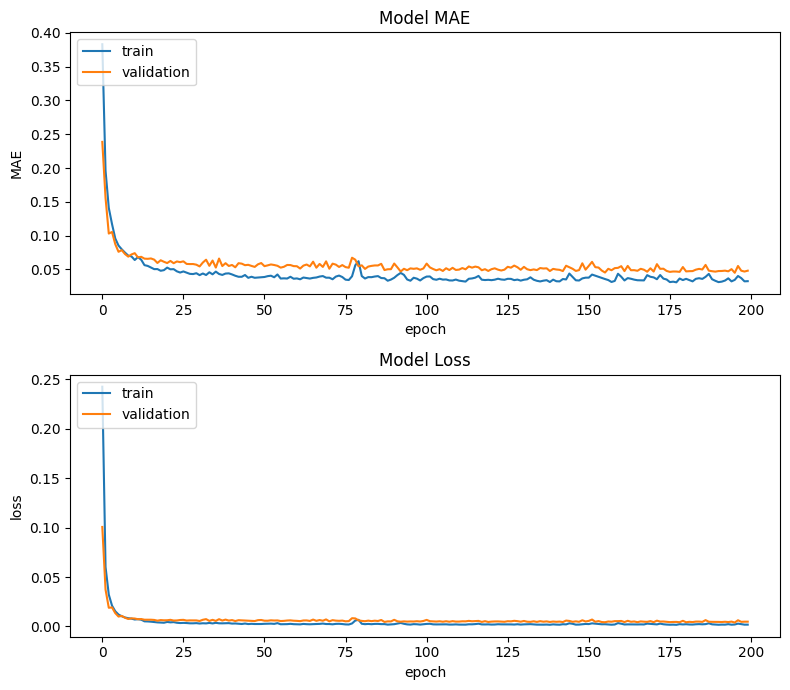

In [14]:
# Plot MSE as a function of epochs
fig = plt.figure(figsize=(8,7)) 
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(hist.history['mae'])
ax1.plot(hist.history['val_mae'])
ax1.set_title('Model MAE')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')
 
# Plot loss and val_loss as a function of epochs
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(hist.history['loss'])
ax2.plot(hist.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')
 
# We save the plot as a png file 
fig.tight_layout()
fig.savefig('plot_results.png')

**R-squared error**

R-squared or Coefficient of Determination is a way to evaluate a regression model.\
The residual sum of squares is given by
$$ SS_{\rm res} = \sum_i (y_i-f_i)^2$$
while the total sum of squares is
$$ SS_{\rm res} = \sum_i (y_i-\bar{y}_i)^2$$


The $R^2$ coefficient is defined by:
$$ R^2 = 1 - \frac{SS_{\rm res}}{SS_{\rm tot}} $$

Therefore, if $R^2=1$ is a perfect model.\
If the prediction is always close to the mean $\bar{y}$, the model is not so good and $R^2=0$.\
If $R^2<0$ then it is a poor model with large errors.

In [10]:
# R^2 score
Y_predict = model.predict(X_test) 
print(r2_score(Y_test, Y_predict)) 

5/5 [==============================] - 0s 1ms/step
0.7623780528321129


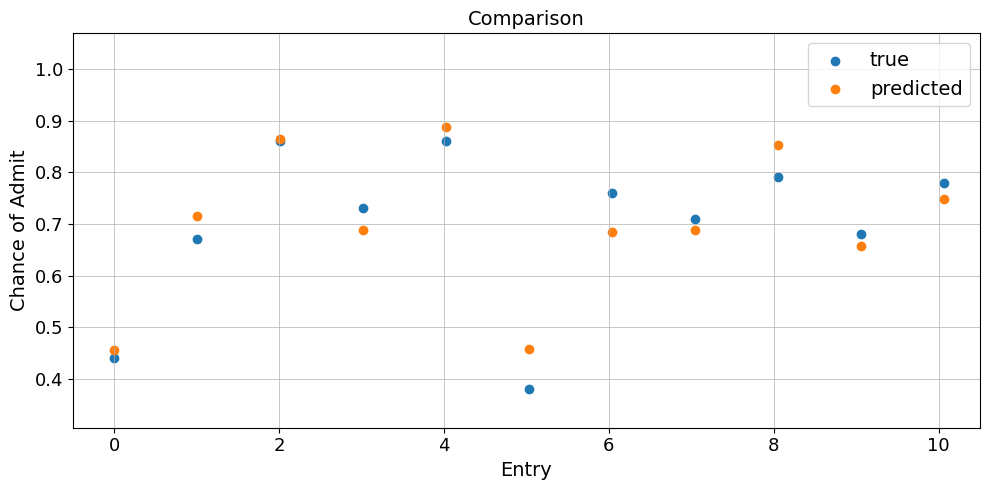

In [15]:
# Let's have a look at the predictions from the first 10 entries
fig = plt.figure(figsize=(10,5)) 
ax = fig.gca()
xx = np.linspace(0, len(Y_test), len(Y_test))
plt.scatter(xx, Y_test, label='true')
plt.scatter(xx,Y_predict, label='predicted')
ax.set_xlim(-0.5,10.5)
plt.xticks(fontsize = 13) 
plt.yticks(fontsize = 13) 

ax.set_ylabel('Chance of Admit', fontsize=14)
ax.set_xlabel('Entry', fontsize=14)

plt.grid(linewidth=0.5)

plt.legend(prop={'size':14})
plt.title('Comparison', fontsize=14, color='black') 
plt.tight_layout()

plt.show()
fig.savefig('test.png')